In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=2500, n_features=100, n_informative=50, noise=100.0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
print(X_train.shape, X_test.shape)

(1750, 100) (750, 100)


In [4]:
from sklearn.metrics import explained_variance_score, r2_score

def print_scores(model, X, y):
    name = type(model).__name__
    y_pred = model.predict(X)
    print(name)
    print("R2 Score:                 %s" % r2_score(y, y_pred))
    print("Explained Variance Score: %s" % explained_variance_score(y, y_pred))

In [5]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
print_scores(lin_model, X_test, y_test)

LinearRegression
R2 Score:                 0.9303804374831202
Explained Variance Score: 0.9306726849035205


In [6]:
from algorithms import SimpleESRegressor
from objectives import RSSObjective

es_model = SimpleESRegressor(objective=RSSObjective(), n_iter=1000, random_state=0)
es_model.fit(X_train, y_train);

100%|██████████| 1000/1000 [00:08<00:00, 117.73it/s]


In [7]:
def plot_model(model, iterations, X, y):
    print_scores(model, X, y)

    name = type(model).__name__
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
    ax.set_title(name + " Score")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("R2 Score")
    ax.plot(range(iterations), model.history_)
    plt.tight_layout()
    plt.savefig("images/" + name + "-R2Curve.png")

SimpleESRegressor
R2 Score:                 0.9303007458470292
Explained Variance Score: 0.9306066069507195


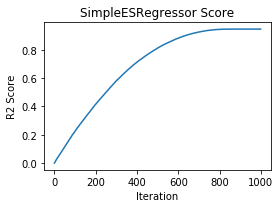

In [8]:
plot_model(es_model, 1000, X_test, y_test)

In [9]:
from algorithms import GeneticESRegressor

es_model = GeneticESRegressor(objective=RSSObjective(), n_iter=1000, random_state=0)
es_model.fit(X_train, y_train);

100%|██████████| 1000/1000 [00:13<00:00, 75.48it/s]


GeneticESRegressor
R2 Score:                 0.9301560971923138
Explained Variance Score: 0.9304737579911521


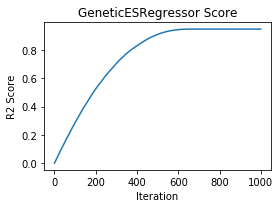

In [10]:
plot_model(es_model, 1000, X_test, y_test)

In [11]:
from algorithms import NaturalESRegressor

es_model = NaturalESRegressor(objective=RSSObjective(), n_iter=1000, random_state=0)
es_model.fit(X_train, y_train);

100%|██████████| 1000/1000 [00:07<00:00, 135.20it/s]


NaturalESRegressor
R2 Score:                 0.9303309998209539
Explained Variance Score: 0.9306266320317137


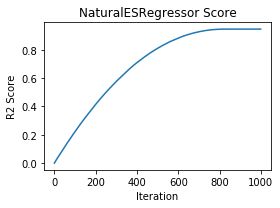

In [12]:
plot_model(es_model, 1000, X_test, y_test)

In [13]:
from algorithms import DifferentialEvolutionRegressor

de_model = DifferentialEvolutionRegressor(objective=RSSObjective(), n_iter=2500, random_state=0, bounds=(-10, 110))
de_model.fit(X_train, y_train);

100%|██████████| 2500/2500 [00:10<00:00, 231.68it/s]


DifferentialEvolutionRegressor
R2 Score:                 0.9270629106837457
Explained Variance Score: 0.9272323227578708


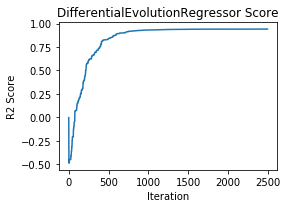

In [14]:
plot_model(de_model, 2500, X_test, y_test)